In [1]:
pip install -U sentence-transformers


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import seaborn as sns




In [3]:
p4k_data = pd.read_csv(r'C:\Users\EmileESMAILI\OneDrive - Ekimetrics\Documents\Python Scripts\pitchfork.csv')
p4k_data.head()

,artist,album,genre,score,date,author,role,review,bnm,link,label,release_year
0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,January 11 2019,Andy Beta,Contributor,"Viva Brother, Terris, Mansun, the Twang, Joe L...",0,https://pitchfork.com/reviews/albums/david-byr...,Nonesuch,2018.0
1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,January 11 2019,Chal Ravens,Contributor,"The Prince of Denmark—that is, the proper prin...",0,https://pitchfork.com/reviews/albums/dj-healer...,Planet Uterus,2019.0
2,Jorge Velez,Roman Birds,Electronic,7.9,January 10 2019,Philip Sherburne,Contributing Editor,"Jorge Velez has long been prolific, but that’s...",0,https://pitchfork.com/reviews/albums/jorge-vel...,Self-released,2019.0
3,Chandra,Transportation EPs,Rock,7.8,January 10 2019,Andy Beta,Contributor,When the Avalanches returned in 2016 after an ...,0,https://pitchfork.com/reviews/albums/chandra-t...,Telephone Explosion,2018.0
4,The Chainsmokers,Sick Boy,Electronic,3.1,January 9 2019,Larry Fitzmaurice,Contributor,We’re going to be stuck with the Chainsmokers ...,0,https://pitchfork.com/reviews/albums/the-chain...,"Disruptor,Columbia",2018.0


<AxesSubplot:xlabel='artist'>

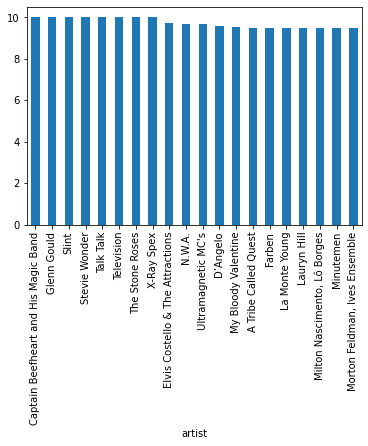

In [4]:
data_by_artist = p4k_data.groupby('artist').mean()
data_by_artist['score'].nlargest(20).plot.bar()

<AxesSubplot:xlabel='score', ylabel='Count'>

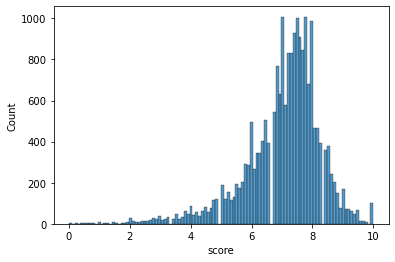

In [5]:
sns.histplot(p4k_data,x='score')

<AxesSubplot:xlabel='release_year'>

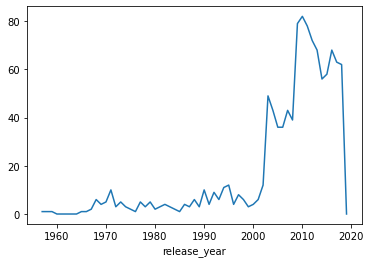

In [6]:
bnm_per_year = p4k_data.groupby('release_year').sum()['bnm']
bnm_per_year.plot()


<AxesSubplot:xlabel='release_year'>

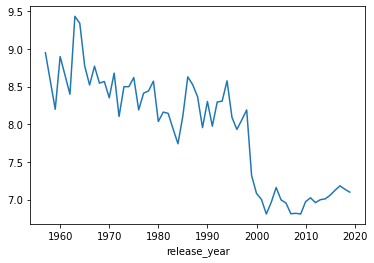

In [7]:
score_per_year = p4k_data.groupby('release_year').mean()['score']
score_per_year.plot()

In [8]:
p4k_data['bnm'].sum()/p4k_data['bnm'].count()

0.05351410913620467

In [9]:
sentences = p4k_data['review']


model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)



KeyboardInterrupt: 

In [35]:
len(embeddings)

20873

In [43]:
p4k_data['vec'] = pd.Series(list(embeddings))


    

In [44]:
p4k_data.head()

,artist,album,genre,score,date,author,role,review,bnm,link,label,release_year,vec
0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,January 11 2019,Andy Beta,Contributor,"Viva Brother, Terris, Mansun, the Twang, Joe L...",0,https://pitchfork.com/reviews/albums/david-byr...,Nonesuch,2018.0,"[0.020074358, 0.0043206215, -0.039724294, -0.0..."
1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,January 11 2019,Chal Ravens,Contributor,"The Prince of Denmark—that is, the proper prin...",0,https://pitchfork.com/reviews/albums/dj-healer...,Planet Uterus,2019.0,"[-0.048721667, 0.022776516, 0.037752792, -0.04..."
2,Jorge Velez,Roman Birds,Electronic,7.9,January 10 2019,Philip Sherburne,Contributing Editor,"Jorge Velez has long been prolific, but that’s...",0,https://pitchfork.com/reviews/albums/jorge-vel...,Self-released,2019.0,"[-0.031132638, -0.07010498, -0.0051508243, -0...."
3,Chandra,Transportation EPs,Rock,7.8,January 10 2019,Andy Beta,Contributor,When the Avalanches returned in 2016 after an ...,0,https://pitchfork.com/reviews/albums/chandra-t...,Telephone Explosion,2018.0,"[-0.14617802, -0.095591985, 0.022203773, -0.02..."
4,The Chainsmokers,Sick Boy,Electronic,3.1,January 9 2019,Larry Fitzmaurice,Contributor,We’re going to be stuck with the Chainsmokers ...,0,https://pitchfork.com/reviews/albums/the-chain...,"Disruptor,Columbia",2018.0,"[-0.043482017, -0.02071257, 0.038199544, -0.06..."


In [142]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    list(p4k_data.vec),
    p4k_data.score,
    test_size = 0.3,
    random_state=42
)
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1,1)

In [143]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
 
rfc = RandomForestClassifier(n_estimators=100)
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

 

In [146]:
# save the model to disk
import pickle
filename = 'C:/git/mypitchfork/models/score_model.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [147]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)
preds = rfr.predict(X_test)


0.041592653464677776


In [148]:
sentence = "this album by Frank Ocean is a amazing"

In [149]:
new_review = model.encode(sentence)
rfr.predict(new_review.reshape(1,-1))

array([7.32])

In [98]:
p4k_data.to_csv('pitchfork_data_vec.csv')


In [54]:
import numpy as np
from numpy.linalg import norm

In [55]:
A = p4k_data['vec'][2]
B = p4k_data['vec'][3]

In [56]:
np.dot(A,B)/(norm(A)*norm(B))

0.284634

In [11]:
p4k_data = pd.read_csv('C:/Users/EmileESMAILI/OneDrive - Ekimetrics/Documents/Python Scripts/pitchfork_data_vec.csv')

array([-4.87216674e-02,  2.27765162e-02,  3.77527922e-02, -4.81720418e-02,
       -1.71378553e-02,  4.26961482e-02,  6.97037429e-02, -2.97807083e-02,
        4.14139479e-02, -2.59138681e-02, -2.45451275e-02, -2.43275799e-02,
        2.70897131e-02, -6.62309974e-02,  2.45081447e-02,  3.05697089e-03,
        1.55214118e-02,  5.24853542e-02, -1.12235676e-02,  7.88289979e-02,
       -7.79734924e-02, -8.60251412e-02, -2.30065780e-03, -8.91735703e-02,
       -1.99694559e-02,  4.33128625e-02,  8.91099051e-02,  3.44729819e-03,
       -8.39906037e-02,  8.28215387e-03,  4.01164517e-02, -1.25533389e-02,
       -7.05871359e-02,  1.43248001e-02,  1.27400272e-02,  1.43828571e-01,
       -5.18756956e-02,  7.28203915e-03,  1.06316321e-02,  7.09946081e-02,
        7.62281939e-02,  2.85076797e-02,  1.15297744e-02,  1.19344480e-02,
       -7.60760275e-04,  3.55458609e-03, -3.30498591e-02, -9.83820707e-02,
       -6.88460916e-02, -3.67590114e-02, -9.72976312e-02, -3.16955484e-02,
        1.50214151e-01, -